#**Classification** **Project** - **EDA**

#Introduction
This is a classification project in which the predictions will be about knowing to which class a certain observation belongs to. There can be two classes or more than two classes. The current case involves only two classes which makes this a binary classification.

As for any machine learning project, the first step will be the Exploratory Data Analysis or EDA. In EDA, the data will be analyzed in detail. Here we will check for missing or null values, any errors in the entries or their data types, data distributions in all the columns, presence of any outliers, and check for correlations.

If any of the above are found to be out of the normal, they will be dealt with here before proceeding to model building.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#About the problem
A. Basic information:

1. ID (Individual ID)

2. Sex (male/female).

3. Age ≥60 above years (true/false)

4. Test date (date when tested for COVID)


B. Symptoms:

5. Cough (true/false).

6. Fever (true/false).

7. Sore throat (true/false).

8. Shortness of breath (true/false).

9. Headache (true/false).


C. Other information:

10. Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

11. Corona positive or negative


#Importing the libraries
######For EDA, the important libraries are pandas for reading the file and for some dataframe operations, matplotlib and seaborn for making graphical analysis on the data.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
import scipy.stats as st
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, classification_report


In [ ]:
df=pd.read_csv('corona_tested_006.csv')

In [ ]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [ ]:
df.shape

(278848, 11)

#####There are total 278848 rows and 11 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
278843    False
278844    False
278845    False
278846    False
278847    False
Length: 278848, dtype: bool

In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

##Checking for any data types


In [ ]:
df.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [ ]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

##Checking unique values

In [ ]:
df["Cough_symptoms"].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [ ]:
df['Fever'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
df["Sore_throat"].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [ ]:
df["Shortness_of_breath"].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
df["Headache"].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
df["Corona"].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [ ]:
df["Age_60_above"].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [ ]:
df["Sex"].unique()

array(['None', 'male', 'female'], dtype=object)

##Dropping unnecessary columns

In [ ]:
df.drop(['Ind_ID','Test_date','Cough_symptoms','Headache','Known_contact'], axis=1, inplace=True)

##Univariate Analysis

<Axes: xlabel='Fever', ylabel='count'>

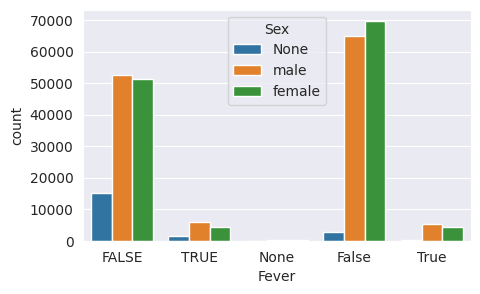

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='Fever', data=df, hue='Sex')

<Axes: xlabel='Sore_throat', ylabel='count'>

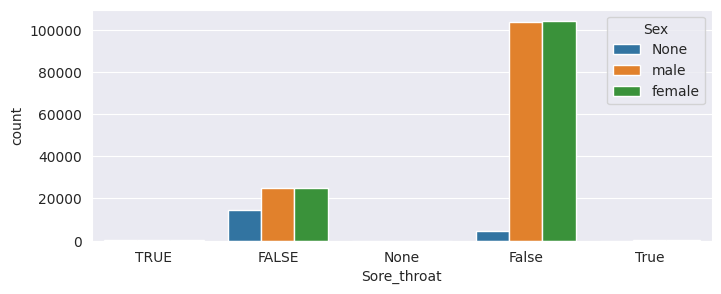

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(x='Sore_throat', hue='Sex', data=df)

<Axes: xlabel='Shortness_of_breath', ylabel='count'>

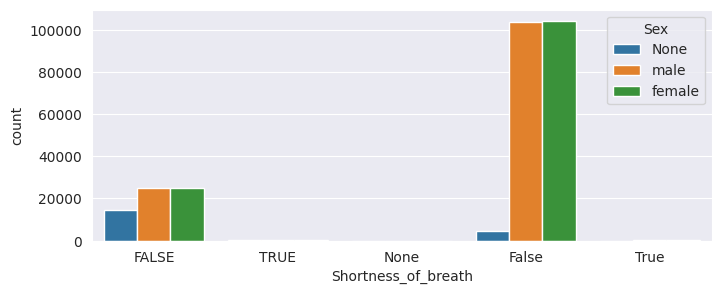

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(x='Shortness_of_breath', hue='Sex', data=df)

#changing the datatype

In [ ]:
df['Fever'] = df['Fever'].astype(str)
df['Sore_throat'] = df['Sore_throat'].astype(str)
df['Shortness_of_breath'] = df['Shortness_of_breath'].astype(str)
df['Corona'] = df['Corona'].astype(str)
df['Age_60_above'] = df['Age_60_above'].astype(str)
df['Sex'] = df['Sex'].astype(str)

#Converting categories into Uppercase

In [ ]:
df['Fever'] = df['Fever'].str.upper()
df['Sore_throat'] = df['Sore_throat'].str.upper()
df['Shortness_of_breath'] = df['Shortness_of_breath'].str.upper()
df['Corona'] = df['Corona'].str.upper()
df['Age_60_above'] = df['Age_60_above'].str.upper()
df['Sex'] = df['Sex'].str.upper()


#Converting columns into Binary using Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Fever'] = le.fit_transform(df['Fever'])
df['Sore_throat'] = le.fit_transform(df['Sore_throat'])
df['Shortness_of_breath'] = le.fit_transform(df['Shortness_of_breath'])
df['Corona'] = le.fit_transform(df['Corona'])
df['Age_60_above'] = le.fit_transform(df['Age_60_above'])
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
df

,Fever,Sore_throat,Shortness_of_breath,Corona,Age_60_above,Sex
0,0,2,0,0,1,2
1,2,0,0,2,1,2
2,2,0,0,2,1,2
3,0,0,0,0,1,2
4,0,0,0,0,1,2
...,...,...,...,...,...,...
278843,0,0,0,2,1,1
278844,0,0,0,0,1,0
278845,0,0,0,0,1,1
278846,0,0,0,0,1,1


##Checking for the correlations

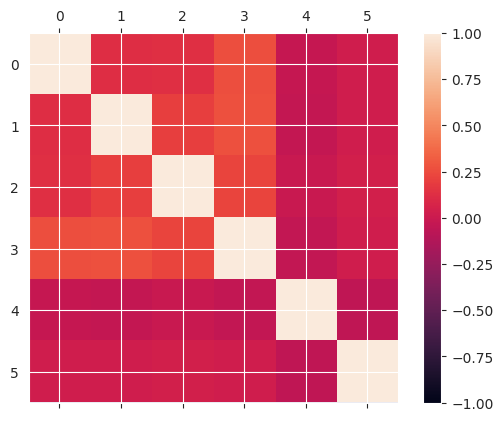

In [ ]:
correlations = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

##**Density** **plots**
These will give information about the distribution of the data

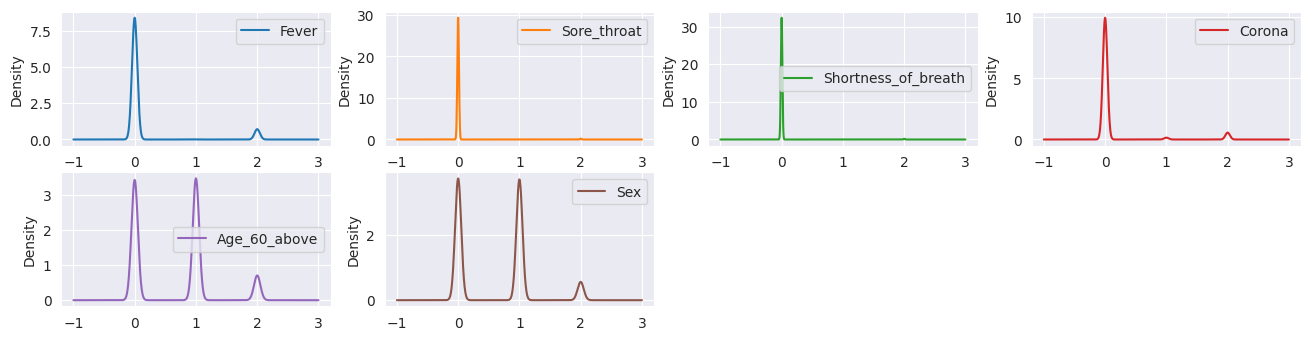

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize = (16, 8))
plt.show()

##**Histograms**
These will give accurate information about the distribution of data.

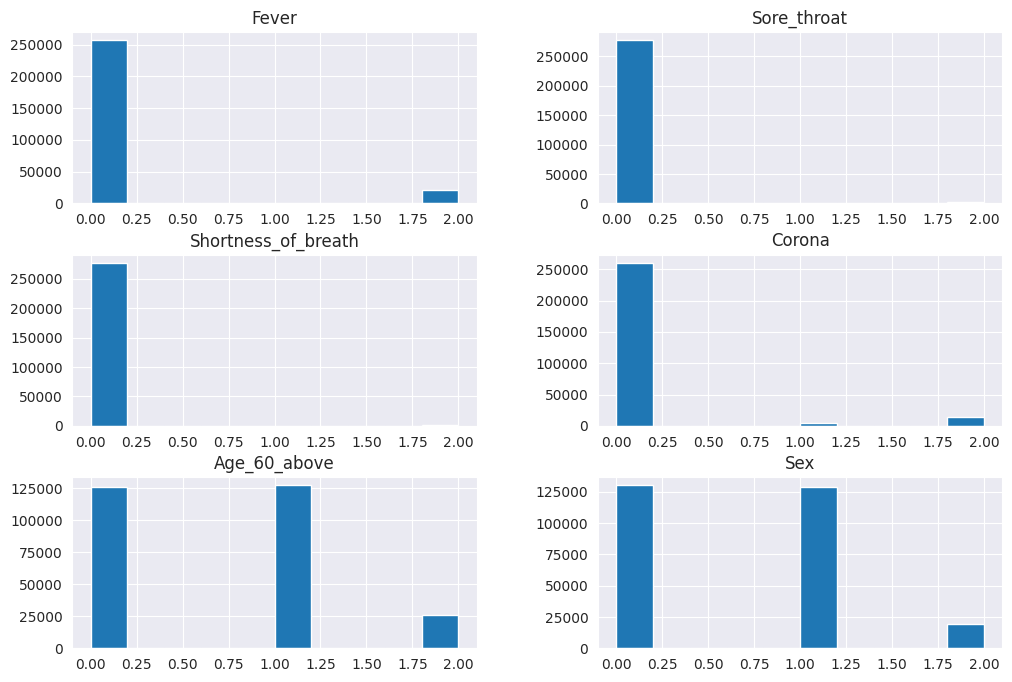

In [ ]:
df.hist(figsize=(12, 8))
plt.show()

##**Pair** **Plot**
It shows the relationship between the variables.

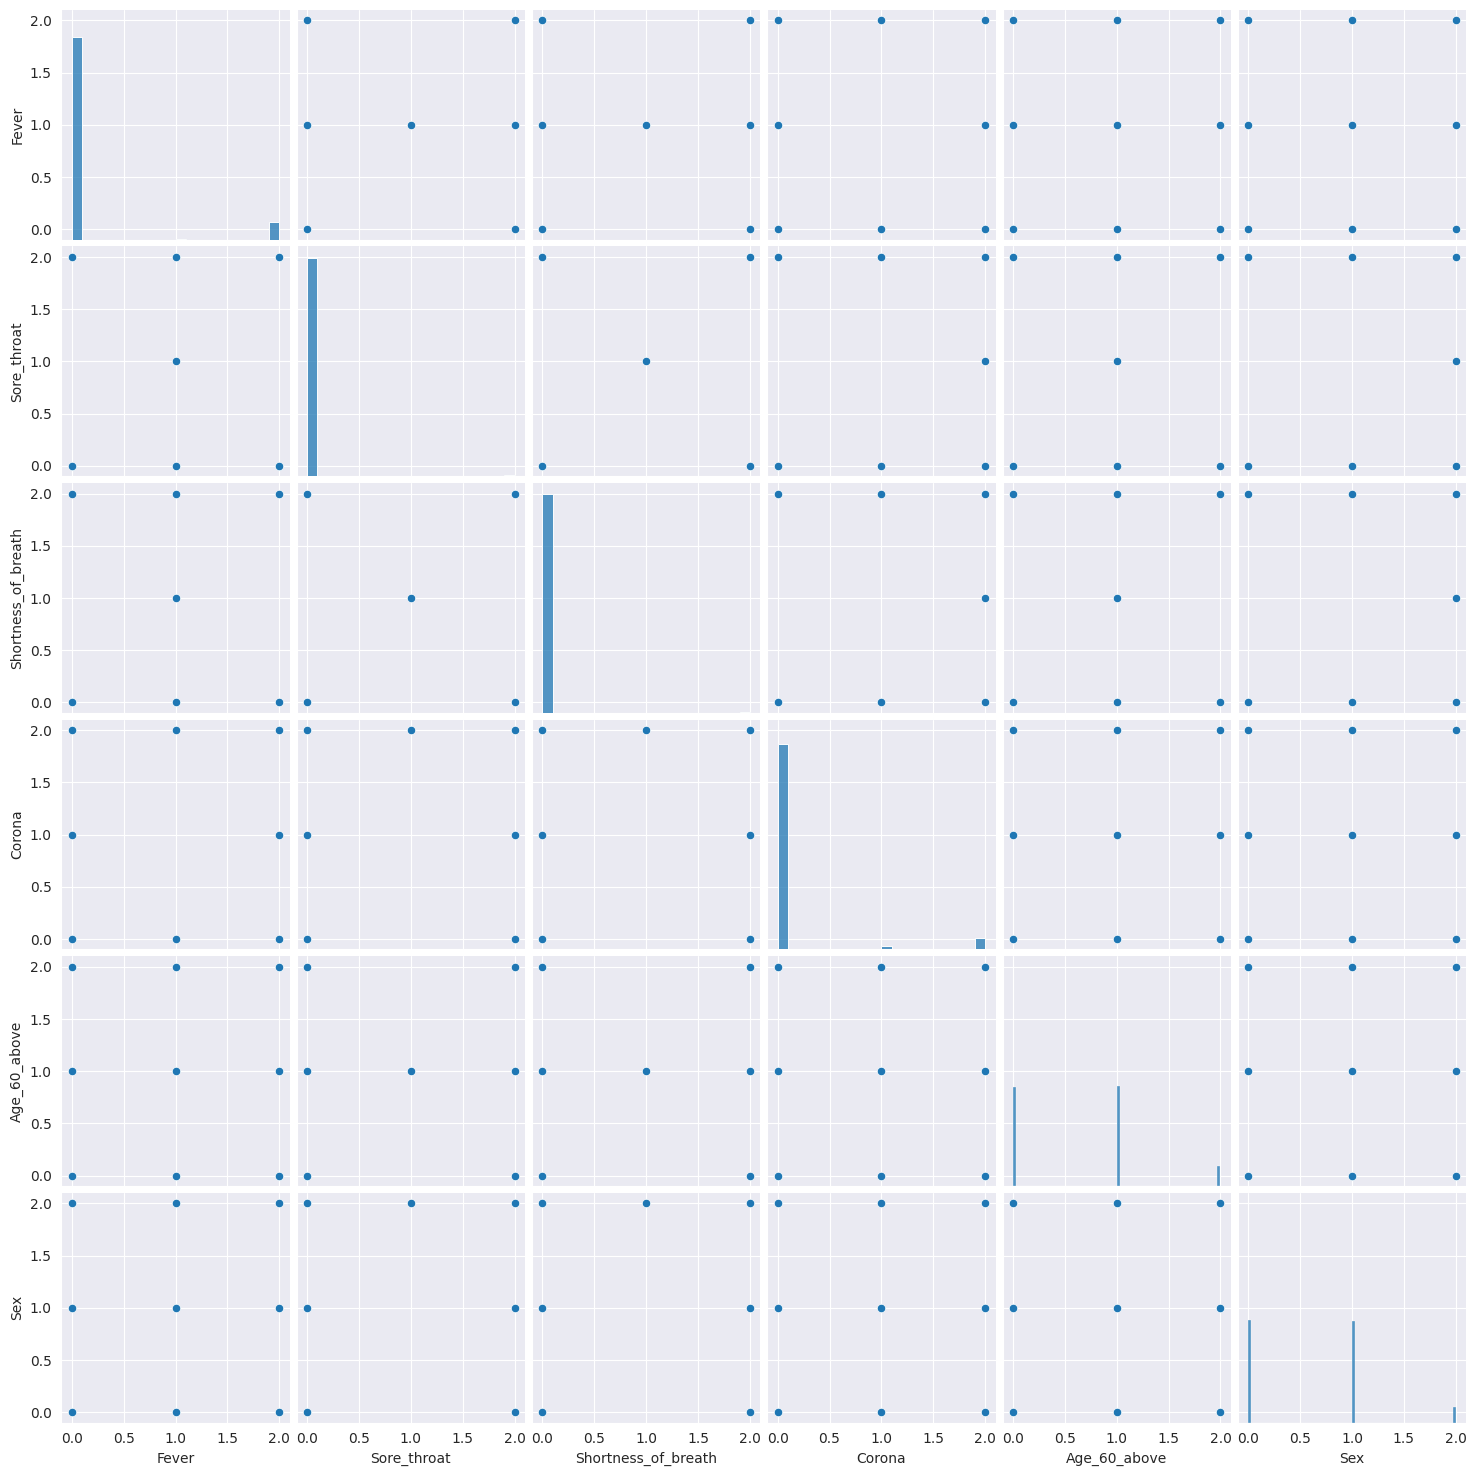

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

#Checking count of each category in the independent variables
Here the count of each category in the variables can be seen both in tabular and visual formats.

In [ ]:
print(df['Fever'].value_counts())
print('----------------------------------------------')
print(df['Sore_throat'].value_counts())
print('----------------------------------------------')
print(df['Shortness_of_breath'].value_counts())
print('----------------------------------------------')
print(df['Corona'].value_counts())
print('----------------------------------------------')
print(df['Age_60_above'].value_counts())
print('----------------------------------------------')
print(df['Sex'].value_counts())

0    256844
2     21752
1       252
Name: Fever, dtype: int64
----------------------------------------------
0    276921
2      1926
1         1
Name: Sore_throat, dtype: int64
----------------------------------------------
0    277270
2      1577
1         1
Name: Shortness_of_breath, dtype: int64
----------------------------------------------
0    260227
2     14729
1      3892
Name: Corona, dtype: int64
----------------------------------------------
1    127320
0    125703
2     25825
Name: Age_60_above, dtype: int64
----------------------------------------------
0    130158
1    129127
2     19563
Name: Sex, dtype: int64


<Axes: title={'center': 'Sex'}>

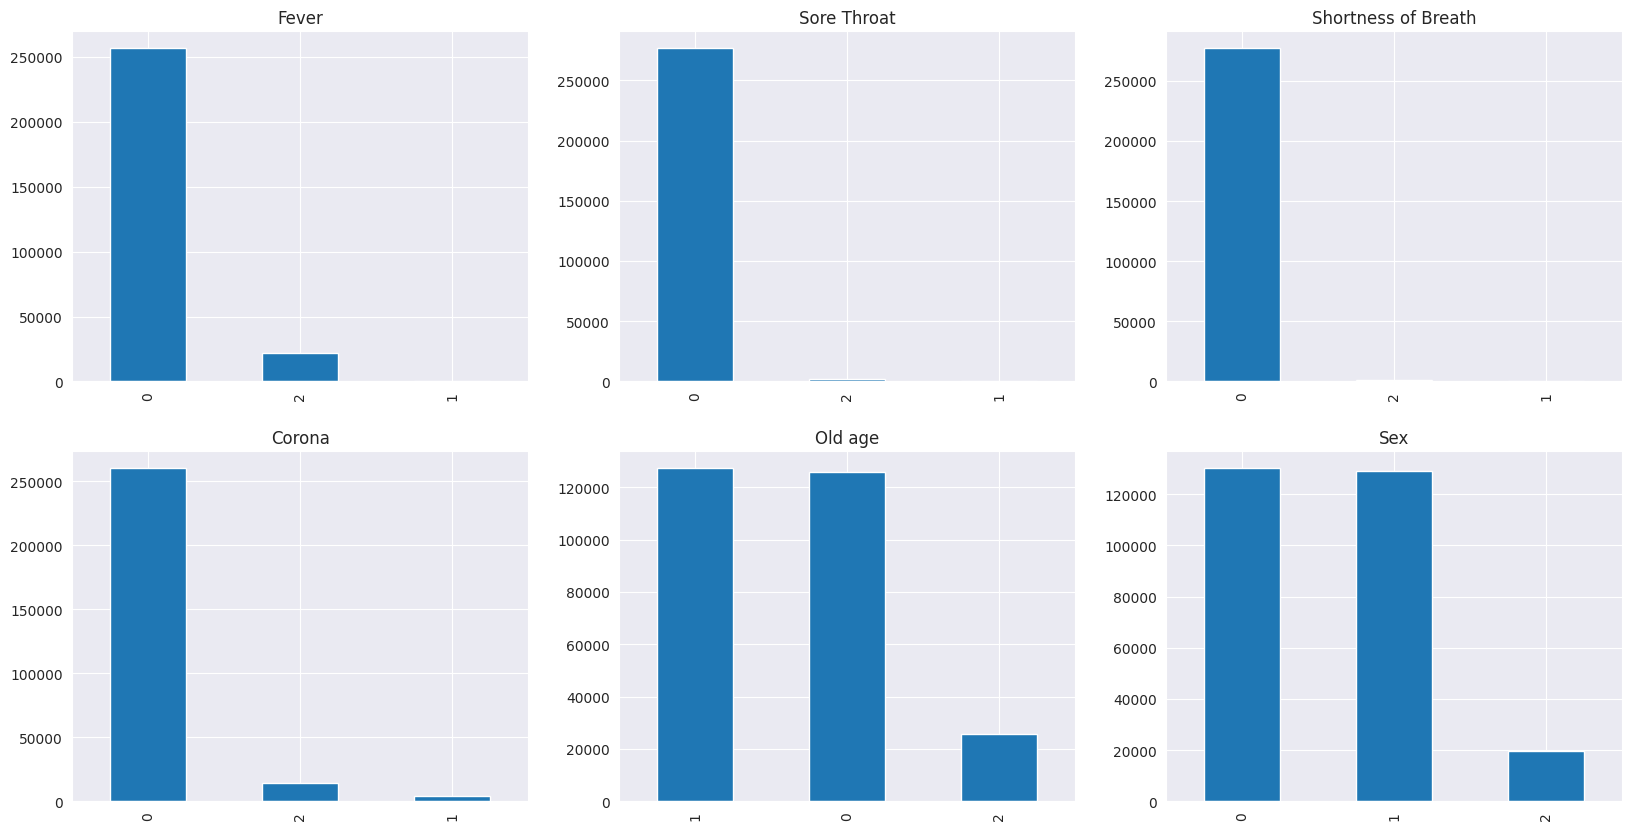

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
df['Fever'].value_counts().plot(kind='bar', ax = axes[0,0], title = 'Fever')
df['Sore_throat'].value_counts().plot(kind='bar', ax = axes[0,1], title = 'Sore Throat')
df['Shortness_of_breath'].value_counts().plot(kind='bar', ax = axes[0,2], title = 'Shortness of Breath')
df['Corona'].value_counts().plot(kind='bar', ax = axes[1,0], title = 'Corona')
df['Age_60_above'].value_counts().plot(kind='bar', ax = axes[1,1], title = 'Old age')
df['Sex'].value_counts().plot(kind='bar', ax = axes[1,2], title = 'Sex')

#Checking cross tables between independent and target variables
Here we can see how many observations in each category of the independent variables belongs to each category of the target variable.

Here we can see both the tabular and visual representations.

In [ ]:
print(pd.crosstab(df['Fever'], df.Corona))
print('----------------------------------------------')
print(pd.crosstab(df['Sore_throat'], df.Corona))
print('----------------------------------------------')
print(pd.crosstab(df['Shortness_of_breath'], df.Corona))
print('----------------------------------------------')
print(pd.crosstab(df['Corona'], df.Corona))
print('----------------------------------------------')
print(pd.crosstab(df['Age_60_above'], df.Corona))
print('----------------------------------------------')
print(pd.crosstab(df['Sex'], df.Corona))

Corona       0     1     2
Fever                     
0       244192  3515  9137
1          219     0    33
2        15816   377  5559
----------------------------------------------
Corona            0     1      2
Sore_throat                     
0            259861  3858  13202
1                 0     0      1
2               366    34   1526
----------------------------------------------
Corona                    0     1      2
Shortness_of_breath                     
0                    259842  3864  13564
1                         0     0      1
2                       385    28   1164
----------------------------------------------
Corona       0     1      2
Corona                     
0       260227     0      0
1            0  3892      0
2            0     0  14729
----------------------------------------------
Corona             0     1     2
Age_60_above                    
0             114602  1836  9265
1             122404  1656  3260
2              23221   400  2204
--

<Axes: xlabel='Sex'>

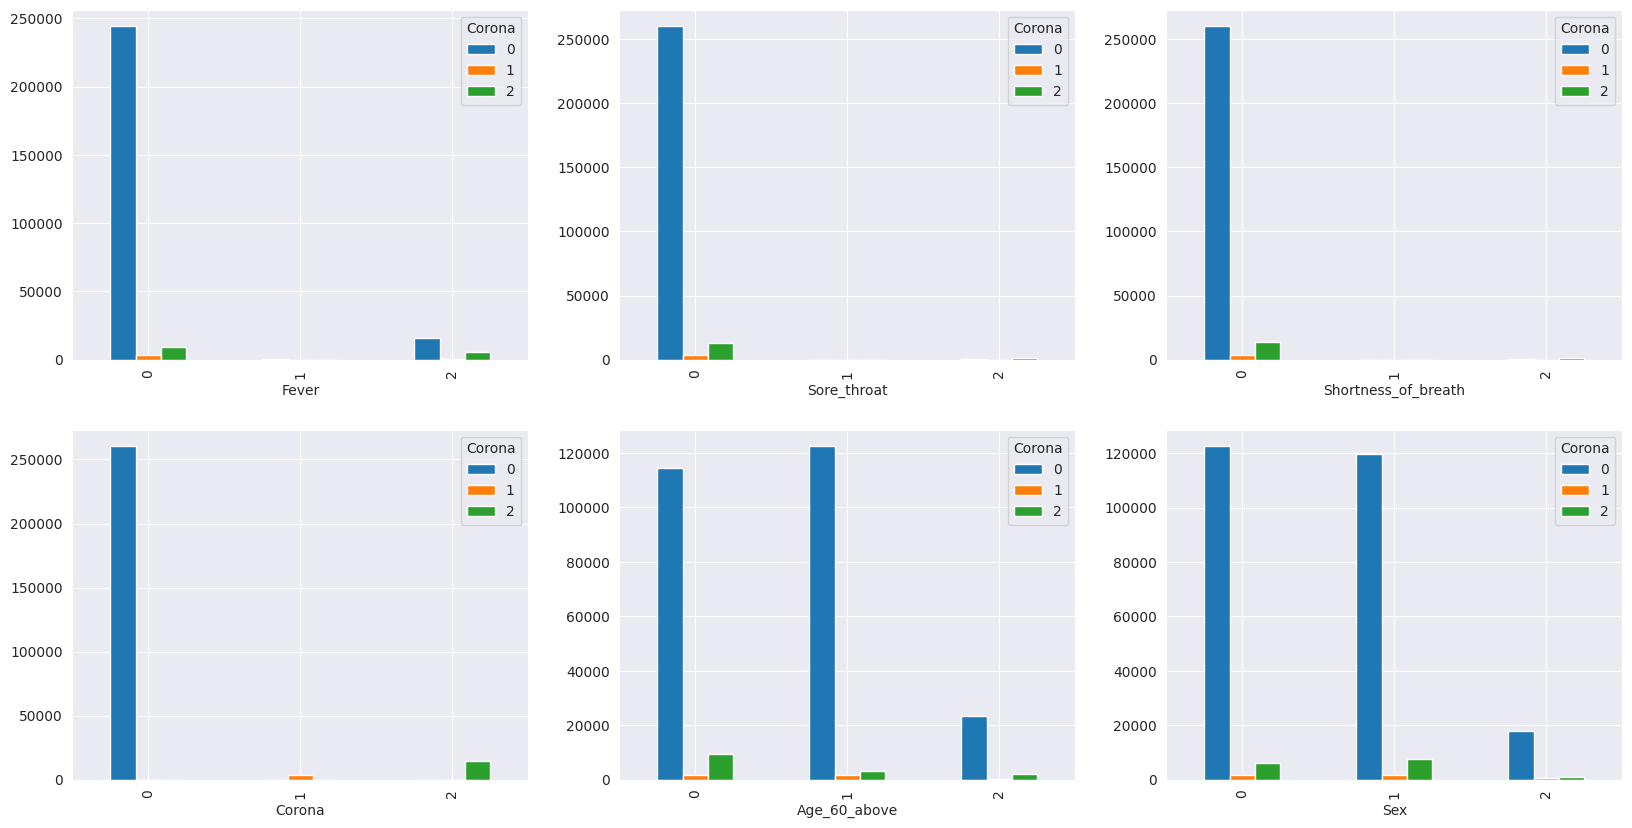

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
pd.crosstab(df['Fever'], df.Corona).plot(kind = 'bar', ax = axes[0,0])
pd.crosstab(df['Sore_throat'], df.Corona).plot(kind = 'bar', ax = axes[0,1])
pd.crosstab(df['Shortness_of_breath'], df.Corona).plot(kind = 'bar', ax = axes[0,2])
pd.crosstab(df['Corona'],df.Corona).plot(kind = 'bar', ax = axes[1,0])
pd.crosstab(df['Age_60_above'], df.Corona).plot(kind = 'bar', ax = axes[1,1])
pd.crosstab(df['Sex'], df.Corona).plot(kind = 'bar', ax = axes[1,2])

#**Model** **Building**
After the EDA, we will proceed with training different machine learning models with the data. The training is done by splitting the data into training and testing sets. The key metric to determine the best model in case of classification problems is the F1 Score. So the models with highest training and testing F1 Scores will be chosen as the best ones.

In [ ]:
x = df.loc[:, ['Fever', 'Sore_throat', 'Shortness_of_breath', 'Age_60_above', 'Sex']]
y = df['Corona']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dec.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
y_pred_train = dec.predict(x_train)
y_pred_test = dec.predict(x_test)

dec_train_acc = accuracy_score(y_train, y_pred_train)
dec_test_acc = accuracy_score(y_test, y_pred_test)

dec_train_f1 = f1_score(y_train, y_pred_train, average='micro')
dec_test_f1 = f1_score(y_test, y_pred_test, average='micro')

dec_train_prec = precision_score(y_train, y_pred_train, average='micro')
dec_test_prec = precision_score(y_test, y_pred_test, average='micro')

dec_test_cm = confusion_matrix(y_test, y_pred_test)

print('Decision tree training accuracy is', dec_train_acc)
print('Decision tree testing accuracy is', dec_test_acc)
print('--------------------------------------------------------')
print('Decision tree training F1_Score is', dec_train_f1)
print('Decision tree testing F1_Score is', dec_test_f1)
print('--------------------------------------------------------')
print('Decision tree training Precision is', dec_train_prec)
print('Decision tree testing Precision is', dec_test_prec)
print('--------------------------------------------------------')
print('Decision tree testing Confusion Matrix is')
print(dec_test_cm)

Decision tree training accuracy is 0.9406382401008233
Decision tree testing accuracy is 0.9401828940290479
--------------------------------------------------------
Decision tree training F1_Score is 0.9406382401008233
Decision tree testing F1_Score is 0.9401828940290479
--------------------------------------------------------
Decision tree training Precision is 0.9406382401008233
Decision tree testing Precision is 0.9401828940290479
--------------------------------------------------------
Decision tree testing Confusion Matrix is
[[77986     0    91]
 [ 1146     0     8]
 [ 3759     0   665]]


#**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

knn_train_acc = accuracy_score(y_train, y_pred_train)
knn_test_acc = accuracy_score(y_test, y_pred_test)

knn_train_f1 = f1_score(y_train, y_pred_train, average='micro')
knn_test_f1 = f1_score(y_test, y_pred_test, average='micro')

knn_train_prec = precision_score(y_train, y_pred_train, average='micro')
knn_test_prec = precision_score(y_test, y_pred_test, average='micro')

knn_test_cm = confusion_matrix(y_test, y_pred_test)

print('KNN training accuracy is', knn_train_acc)
print('KNN testing accuracy is', knn_test_acc)
print('--------------------------------------------------------')
print('KNN training F1 Score is', knn_train_f1)
print('KNN testing F1 Score is', knn_test_f1)
print('--------------------------------------------------------')
print('KNN training Precision is', knn_train_prec)
print('KNN testing Precision is', knn_test_prec)
print('--------------------------------------------------------')
print('KNN testing Confusion Matrix is')
print(knn_test_cm)

KNN training accuracy is 0.9402949900867347
KNN testing accuracy is 0.9400514015898631
--------------------------------------------------------
KNN training F1 Score is 0.9402949900867347
KNN testing F1 Score is 0.9400514015898631
--------------------------------------------------------
KNN training Precision is 0.9402949900867347
KNN testing Precision is 0.9400514015898631
--------------------------------------------------------
KNN testing Confusion Matrix is
[[77794     0   283]
 [ 1140     0    14]
 [ 3578     0   846]]


#**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(max_depth=5, criterion='entropy')
rnd.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [ ]:
rnd_train_acc = accuracy_score(y_train, y_pred_train)
rnd_test_acc = accuracy_score(y_test, y_pred_test)

rnd_train_f1 = f1_score(y_train, y_pred_train, average='micro')
rnd_test_f1 = f1_score(y_test, y_pred_test, average='micro')

rnd_train_prec = precision_score(y_train, y_pred_train, average='micro')
rnd_test_prec = precision_score(y_test, y_pred_test, average='micro')


rnd_test_cm = confusion_matrix(y_test, y_pred_test)

print('Random Forest training accuracy is', rnd_train_acc)
print('Random Forest testing accuracy is', rnd_test_acc)
print('--------------------------------------------------------')
print('Random Forest training F1 Score is', rnd_train_f1)
print('Random Forest testing F1 Score is', rnd_test_f1)
print('--------------------------------------------------------')
print('Random training Precision is', rnd_train_prec)
print('Random testing Precision is', rnd_test_prec)
print('--------------------------------------------------------')
print('Random Forest testing Confusion Matrix is')
print(rnd_test_cm)

Random Forest training accuracy is 0.9402949900867347
Random Forest testing accuracy is 0.9400514015898631
--------------------------------------------------------
Random Forest training F1 Score is 0.9402949900867347
Random Forest testing F1 Score is 0.9400514015898631
--------------------------------------------------------
Random training Precision is 0.9402949900867347
Random testing Precision is 0.9400514015898631
--------------------------------------------------------
Random Forest testing Confusion Matrix is
[[77794     0   283]
 [ 1140     0    14]
 [ 3578     0   846]]


#**Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=RandomForestClassifier(max_depth = 5), n_estimators=10)
bag.fit(x_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5))

In [ ]:
y_pred_train = bag.predict(x_train)
y_pred_test = bag.predict(x_test)

bag_train_acc = accuracy_score(y_train, y_pred_train)
bag_test_acc = accuracy_score(y_test, y_pred_test)

bag_train_f1 = f1_score(y_train, y_pred_train,average='micro')
bag_test_f1 = f1_score(y_test, y_pred_test,average='micro')

bag_train_prec = precision_score(y_train, y_pred_train, average='micro')
bag_test_prec = precision_score(y_test, y_pred_test, average='micro')

bag_test_cm = confusion_matrix(y_test, y_pred_test)

print('Bagging training accuracy is', bag_train_acc)
print('Bagging testing accuracy is', bag_test_acc)
print('--------------------------------------------------------')
print('Bagging training F1 Score is', bag_train_f1)
print('Bagging testing F1 Score is', bag_test_f1)
print('--------------------------------------------------------')
print('Random training Precision is', bag_train_prec)
print('Random testing Precision is', bag_test_prec)
print('--------------------------------------------------------')
print('Bagging testing Confusion Matrix is')
print(bag_test_cm)

Bagging training accuracy is 0.9406997177152869
Bagging testing accuracy is 0.9402546171776941
--------------------------------------------------------
Bagging training F1 Score is 0.9406997177152869
Bagging testing F1 Score is 0.9402546171776941
--------------------------------------------------------
Random training Precision is 0.9406997177152869
Random testing Precision is 0.9402546171776941
--------------------------------------------------------
Bagging testing Confusion Matrix is
[[77987     0    90]
 [ 1146     0     8]
 [ 3754     0   670]]


#**Ada Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))

In [ ]:
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

ada_train_acc = accuracy_score(y_train, y_pred_train)
ada_test_acc = accuracy_score(y_test, y_pred_test)

ada_train_f1 = f1_score(y_train, y_pred_train, average='micro')
ada_test_f1 = f1_score(y_test, y_pred_test, average='micro')

ada_train_prec = precision_score(y_train, y_pred_train, average='micro')
ada_test_prec = precision_score(y_test, y_pred_test, average='micro')

ada_test_cm = confusion_matrix(y_test, y_pred_test)

print('AdaBoost training accuracy is', ada_train_acc)
print('AdaBoost testing accuracy is', ada_test_acc)
print('--------------------------------------------------------')
print('AdaBoost training F1 Score is', ada_train_f1)
print('AdaBoost testing F1 Score is', ada_test_f1)
print('--------------------------------------------------------')
print('AdaBoost training Precision is', ada_train_prec)
print('AdaBoost testing Precision is', ada_test_prec)
print('--------------------------------------------------------')
print('AdaBoost testing Confusion Matrix is')
print(ada_test_cm)

AdaBoost training accuracy is 0.9408277960787528
AdaBoost testing accuracy is 0.9405056481979559
--------------------------------------------------------
AdaBoost training F1 Score is 0.9408277960787528
AdaBoost testing F1 Score is 0.9405056481979559
--------------------------------------------------------
AdaBoost training Precision is 0.9408277960787528
AdaBoost testing Precision is 0.9405056481979559
--------------------------------------------------------
AdaBoost testing Confusion Matrix is
[[77977     0   100]
 [ 1146     0     8]
 [ 3723     0   701]]


#**Gradient** **Boosting** **Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=42)
grad.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_train = grad.predict(x_train)
y_pred_test = grad.predict(x_test)

grad_train_acc = accuracy_score(y_train, y_pred_train)
grad_test_acc = accuracy_score(y_test, y_pred_test)

grad_train_f1 = f1_score(y_train, y_pred_train,average='micro')
grad_test_f1 = f1_score(y_test, y_pred_test,average='micro')

grad_train_prec = precision_score(y_train, y_pred_train,average='micro')
grad_test_prec = precision_score(y_test, y_pred_test,average='micro')

grad_test_cm = confusion_matrix(y_test, y_pred_test)

print('Gradient Boost training accuracy is', grad_train_acc)
print('Gradient Boost testing accuracy is', grad_test_acc)
print('--------------------------------------------------------')
print('Gradient Boost training F1 Score is', grad_train_f1)
print('Gradient Boost testing F1 Score is', grad_test_f1)
print('--------------------------------------------------------')
print('Gradient Boost training Precision is', grad_train_prec)
print('Gradient Boost testing Precision is', grad_test_prec)
print('--------------------------------------------------------')
print('Gradient Boost testing Confusion Matrix is')
print(grad_test_cm)

Gradient Boost training accuracy is 0.9407714415988279
Gradient Boost testing accuracy is 0.9404339250493097
--------------------------------------------------------
Gradient Boost training F1 Score is 0.9407714415988279
Gradient Boost testing F1 Score is 0.9404339250493097
--------------------------------------------------------
Gradient Boost training Precision is 0.9407714415988279
Gradient Boost testing Precision is 0.9404339250493097
--------------------------------------------------------
Gradient Boost testing Confusion Matrix is
[[77973     0   104]
 [ 1146     0     8]
 [ 3725     0   699]]


In [ ]:
results = {
    'Model Name': ['Decision Tree', 'KNN', 'Random Forest', 'Bagging', 'AdaBoost',
                   'Gradient Boost'],
    'Training Accuracy': [dec_train_acc, knn_train_acc, rnd_train_acc, bag_train_acc,
                          ada_train_acc, grad_train_acc],
    'Testing Accuracy': [dec_test_acc, knn_test_acc, rnd_test_acc, bag_test_acc,
                         ada_test_acc, grad_test_acc],
    'Training F1 Score': [dec_train_f1, knn_train_f1, rnd_train_f1, bag_train_f1,
                          ada_train_f1, grad_train_f1],
    'Testing F1 Score': [dec_test_f1, knn_test_f1, rnd_test_f1, bag_test_f1,
                         ada_test_f1, grad_test_f1]
}

results_df = pd.DataFrame(results)
results_df

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,Decision Tree,0.940638,0.940183,0.940638,0.940183
1,KNN,0.940295,0.940051,0.940295,0.940051
2,Random Forest,0.940295,0.940051,0.940295,0.940051
3,Bagging,0.940700,0.940255,0.940700,0.940255
4,AdaBoost,0.940828,0.940506,0.940828,0.940506
5,Gradient Boost,0.940771,0.940434,0.940771,0.940434


In [ ]:
results_df.sort_values(by=['Training Accuracy', 'Testing Accuracy'], ascending=False)

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
4,AdaBoost,0.940828,0.940506,0.940828,0.940506
5,Gradient Boost,0.940771,0.940434,0.940771,0.940434
3,Bagging,0.940700,0.940255,0.940700,0.940255
0,Decision Tree,0.940638,0.940183,0.940638,0.940183
1,KNN,0.940295,0.940051,0.940295,0.940051
2,Random Forest,0.940295,0.940051,0.940295,0.940051


Here Ada Boost Classifier gives the highest accuracy, so we will consider it as a Best Model.